# Sentiment Analysis using LSTM with Attention

## **Introduction**

**Sentiment Analysis**

Sentiment Analysis refers to the finding the sentiment of a Text. We can identify the emotional tone behind a body of text. 
This is a popular way for organizations to determine and categorize opinions about a product, service, or idea. 

We can classify the sentiment as positive, negative, or neutral.

**LSTM**

Long short-term memory (LSTM) is an artificial neural network used in the fields of artificial intelligence and deep learning.
It is a variety of recurrent neural networks (RNNs) that are capable of learning long-term dependencies, especially in sequence prediction problems.
Unlike standard feedforward neural networks, LSTM has feedback connections. Such a recurrent neural network can process not only single data points, but also entire sequences of data.

## **Dataset**

UCI Machine Learning Repository’s Sentiment Labelled Sentences contains text data.
It contains sentences labelled with positive or negative sentiment.
Score is either 1 (for positive) or 0 (for negative)
The sentences come from three different websites/fields:
- Imdb.com
- Amazon.com
- yelp.com



For each website, there exist 500 positive and 500 negative sentences. Those were selected randomly for larger datasets of reviews.
We attempted to select sentences that have a clearly positive or negative connotaton, the goal was for no neutral sentences to be selected.
Download Link: https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences

**We will be using only the amazon dataset**
 - No. of Rows : 1000
 - Format : sentence \t score \n


## **Requirements**

We need to install following libraries for the code to work properly
1. numpy
2. pandas
3. nltk
4. scikit learn
5. tensorflow
6. keras
7. attention

**Numpy**

Python library used for working with arrays. It also has functions for working in domain of linear algebra, fourier transform, and matrices.

**Pandas**

pandas is a software library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series.

**NLTK**

The Natural Language Toolkit (NLTK) is a suite of libraries and programs for symbolic and statistical natural language processing. 

**Scikit Learn**

Machine learning library for the Python. It features various classification, regression and clustering algorithms including support-vector machines, random forests, etc.
It can interoperate with the numpy and scipy.

**Tensorflow**

TensorFlow is a free and open-source software library for machine learning and artificial intelligence. It can be used across a range of tasks but has a particular focus on training and inference of deep neural networks

**Keras**

Keras is an open-source software library that provides a Python interface for artificial neural networks. Keras acts as an interface for the TensorFlow library. Up until version 2.3, Keras supported multiple backends, including TensorFlow, Microsoft Cognitive Toolkit, Theano, and PlaidML

**Attention**

Many-to-one attention mechanism for Keras

### Linux Environment

Open terminal and run the following commands

In [ ]:
pip install numpy pandas nltk scikit-learn tensorflow keras attention

### Windows Environment

Open Command Prompt and run the following commans

In [ ]:
python -m pip install numpy pandas nltk scikit-learn tensorflow keras attention

## **Algorithm**

LSTM is an updated version of Recurrent Neural Network to overcome the vanishing gradient problem. 

It has a memory cell at the top which helps to carry the information from a particular time instance to the next time instance in an efficient manner. So, it can able to remember a lot of information from previous states when compared to RNN and overcomes the vanishing gradient problem. Information might be added or removed from the memory cell with the help of valves.

LSTM network is fed by input data from the current time instance and output of hidden layer from the previous time instance. These two data passes through various activation functions and valves in the network before reaching the output.

Basic lstm gets confused between the words and sometimes can predict the wrong word. So whenever this type of situation occurs the encoder step needs to search for the most relevant information, this idea is called 'Attention'. A simple structure of the bidirectional LSTM model can be represented by the below image.


LSTM with Attention Mechanism Architecture


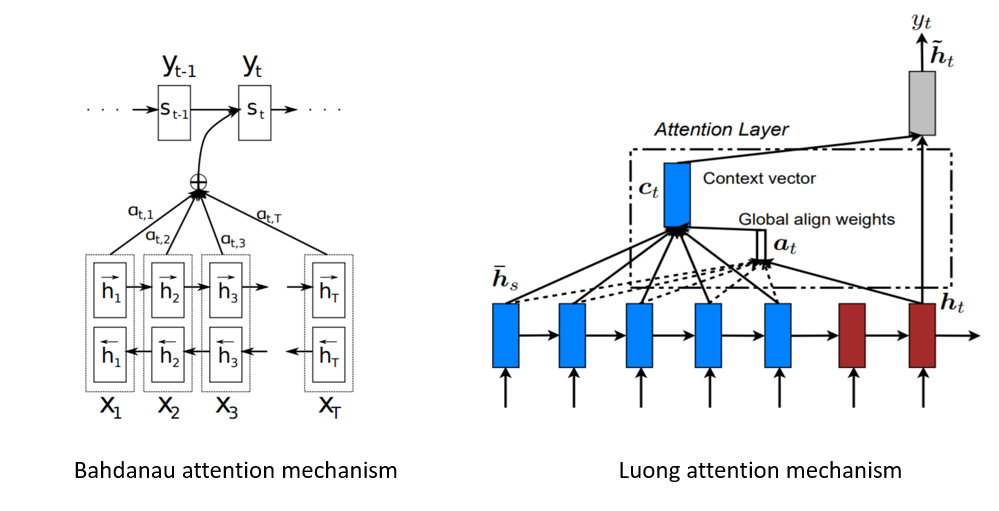

In [29]:
from IPython.display import Image
print("LSTM with Attention Mechanism Architecture")
Image('lstm_with_attention_architecture.png')

Steps
1. Importing required libraries.
2. Loading the dataset and creating a new column ‘sentiment’ based on ‘rating’.
3. Checking for null values in the dataset.
4. Cleaning the data. It includes removing the special characters, digits, unnecessary symbols, and stop words. Also, it is required to convert the words to their root form for easy interpretation..
5. Building the LSTM model using the ‘Keras’ library. This step involves model initialization, adding required LSTM layers, and model compilation
6. Splitting the data into training and testing data.
7. Add Attention layer
8. Training the model using training data.
9. Evaluating the model

## **Code**

In [2]:
# Import Libraries
import pandas as pd    
import numpy as np 
from nltk.corpus import stopwords   
from sklearn.model_selection import train_test_split       
from tensorflow.keras.preprocessing.text import Tokenizer  
from tensorflow.keras.preprocessing.sequence import pad_sequences   
from tensorflow.keras.models import Sequential     
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [3]:
# Import dataset
data = pd.read_csv("amazon.txt", delimiter='\t', header=None,names=["text","target"])
print(data)

                                                  text  target
0    So there is no way for me to plug it in here i...       0
1                          Good case, Excellent value.       1
2                               Great for the jawbone.       1
3    Tied to charger for conversations lasting more...       0
4                                    The mic is great.       1
..                                                 ...     ...
995  The screen does get smudged easily because it ...       0
996  What a piece of junk.. I lose more calls on th...       0
997                       Item Does Not Match Picture.       0
998  The only thing that disappoint me is the infra...       0
999  You can not answer calls with the unit, never ...       0

[1000 rows x 2 columns]


In [4]:
# Display English Stopwords
english_stops = set(stopwords.words('english'))
print(english_stops)

{'did', 'these', 'are', 'off', 'again', "wasn't", 'ain', 'once', 'before', 'nor', 'for', "aren't", 'both', 'himself', 'been', 'theirs', 'shouldn', 'those', 'each', 'in', 'yours', 'hers', 'don', 'no', 'into', 'd', 'him', 'of', 'other', 'isn', 'from', 've', 'if', 'there', 'haven', 'hasn', 'i', 'm', "mightn't", 'their', 's', "don't", 'will', 'between', 'where', 'be', 'this', "doesn't", 'against', 'any', 'further', 'as', 'them', 'up', 'under', 'itself', "should've", 'too', 'has', "shouldn't", "you've", 'such', 'do', "hadn't", 'myself', 'll', 'my', 'ma', 'does', 'now', 'most', 'at', 'can', 'who', 'down', "won't", 'won', 'shan', 'we', 'ours', 'so', 'having', "it's", 'through', "mustn't", 'more', 'own', 'how', 'his', 'it', 'with', "didn't", "you'd", 'all', 'below', 'our', 'mightn', 'whom', 'yourself', 'herself', "hasn't", 'y', 'an', 'about', 'needn', 'she', 'is', 'couldn', 'over', 'was', 'what', 'why', 'hadn', 'few', 'me', 'wouldn', "wouldn't", "you're", 'doing', 'on', 'themselves', 'until', 

In [7]:
def preprocess_dataset():
    data1 = pd.read_csv("amazon.txt", delimiter='\t', header=None,names=["text","target"])
    df = data1
    x_data = df['text']       # Reviews/Input
    y_data = df['target']    # Sentiment/Output

    # PRE-PROCESS REVIEW
    x_data = x_data.replace({'<.*?>': ''}, regex = True)          # remove html tag
    x_data = x_data.replace({'[^A-Za-z]': ' '}, regex = True)     # remove non alphabet
    x_data = x_data.apply(lambda review: [w for w in review.split() if w not in english_stops])  # remove stop words
    x_data = x_data.apply(lambda review: [w.lower() for w in review])   # lower case
    
    return x_data, y_data

x_data, y_data = preprocess_dataset()

In [9]:
# Data after preprocessing
print('Text')
print(x_data, '\n')

Text
0          [so, way, plug, us, unless, i, go, converter]
1                         [good, case, excellent, value]
2                                       [great, jawbone]
3      [tied, charger, conversations, lasting, minute...
4                                      [the, mic, great]
                             ...                        
995    [the, screen, get, smudged, easily, touches, e...
996           [what, piece, junk, i, lose, calls, phone]
997                    [item, does, not, match, picture]
998     [the, thing, disappoint, infra, red, port, irda]
999            [you, answer, calls, unit, never, worked]
Name: text, Length: 1000, dtype: object 



In [11]:
# Sentiment associated with data
print('Target Sentiment')
print(y_data)

Target Sentiment
0      0
1      1
2      1
3      0
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: target, Length: 1000, dtype: int64


In [13]:
# Splitting the data into train and test dataset
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2)

In [14]:
print('Train Set')
print(x_train, '\n')
print(y_train, '\n')

Train Set
219                        [i, still, infatuated, phone]
982                                       [waste, money]
682    [this, product, clearly, ready, prime, time, i...
741         [couldn, use, unit, sunglasses, good, texas]
251                      [o, gosh, best, phone, i, ever]
                             ...                        
210    [i, bother, contacting, company, dollar, produ...
85           [the, headsets, easy, use, everyone, loves]
858    [if, i, take, picture, battery, drops, bar, st...
203    [the, best, electronics, available, fm, transm...
495                                  [plug, wrong, size]
Name: text, Length: 800, dtype: object 

219    1
982    0
682    0
741    0
251    1
      ..
210    0
85     1
858    0
203    1
495    0
Name: target, Length: 800, dtype: int64 



In [15]:
print('Test Set')
print(x_test, '\n')
print(y_test)

Test Set
223    [all, i, expected, better, consumer, experienc...
976                                    [sweetest, phone]
239                                  [do, make, mistake]
888      [don, trust, website, expect, helpful, support]
786                           [they, work, weeks, break]
                             ...                        
773                    [the, reception, generally, good]
860                                 [last, time, buying]
119                                     [setup, simpler]
139                     [voice, recognition, tremendous]
804                   [yes, shiny, front, side, i, love]
Name: text, Length: 200, dtype: object 

223    0
976    1
239    0
888    0
786    0
      ..
773    1
860    0
119    1
139    1
804    1
Name: target, Length: 200, dtype: int64


In [16]:
def get_max_length():
    review_length = []
    for review in x_train:
        review_length.append(len(review))

    return int(np.ceil(np.mean(review_length)))

In [17]:
# ENCODE REVIEW
token = Tokenizer(lower=False)    # no need lower, because already lowered the data in load_data()
token.fit_on_texts(x_train)
x_train = token.texts_to_sequences(x_train)
x_test = token.texts_to_sequences(x_test)

max_length = get_max_length()

x_train = pad_sequences(x_train, maxlen=max_length, padding='post', truncating='post')
x_test = pad_sequences(x_test, maxlen=max_length, padding='post', truncating='post')

total_words = len(token.word_index) + 1   # add 1 because of 0 padding

print('Encoded X Train\n', x_train, '\n')
print('Encoded X Test\n', x_test, '\n')
print('Maximum review length: ', max_length)

Encoded X Train
 [[   1   48  633 ...    0    0    0]
 [  71   40    0 ...    0    0    0]
 [   8    7  634 ...  636   31    1]
 ...
 [  67    1  177 ...   16 1543  505]
 [   3   23 1547 ... 1549 1550    0]
 [  81  371 1551 ...    0    0    0]] 

Encoded X Test
 [[ 199    1  515 ...  776 1262   88]
 [   2    0    0 ...    0    0    0]
 [ 171   89  295 ...    0    0    0]
 ...
 [ 551    0    0 ...    0    0    0]
 [ 136  830    0 ...    0    0    0]
 [ 553  521    1 ...    0    0    0]] 

Maximum review length:  7


LSTM with Attention (Without Library)

In [18]:
from keras.layers import Layer
import keras.backend as K
import keras

class attention(Layer):
    def __init__(self,**kwargs):
        super(attention,self).__init__(**kwargs)

    def build(self,input_shape):
        self.W=self.add_weight(name="att_weight",shape=(input_shape[-1],1),initializer="normal")
        self.b=self.add_weight(name="att_bias",shape=(input_shape[1],1),initializer="zeros")        
        super(attention, self).build(input_shape)

    def call(self,x):
        et=K.squeeze(K.tanh(K.dot(x,self.W)+self.b),axis=-1)
        at=K.softmax(et)
        at=K.expand_dims(at,axis=-1)
        output=x*at
        return K.sum(output,axis=1)

    def compute_output_shape(self,input_shape):
        return (input_shape[0],input_shape[-1])

    def get_config(self):
        return super(attention,self).get_config()

In [19]:
from tensorflow.keras import Input
from tensorflow.keras.models import Model

inputs=Input((max_length,))
x=Embedding(input_dim=total_words,output_dim=32,input_length=max_length,\
            embeddings_regularizer=keras.regularizers.l2(.001))(inputs)
att_in=LSTM(256,return_sequences=True,dropout=0.3,recurrent_dropout=0.2)(x)
att_out=attention()(att_in)
outputs=Dense(1,activation='sigmoid',trainable=True)(att_out)
model=Model(inputs,outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 7)]               0         
                                                                 
 embedding (Embedding)       (None, 7, 32)             49664     
                                                                 
 lstm (LSTM)                 (None, 7, 256)            295936    
                                                                 
 attention (attention)       (None, 256)               263       
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 346,120
Trainable params: 346,120
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(x_train, y_train, batch_size = 128, epochs = 5)

Epoch 1/5
7/7 [==============================] - 5s 59ms/step - loss: 0.7290 - accuracy: 0.5025
Epoch 2/5
7/7 [==============================] - 0s 52ms/step - loss: 0.7137 - accuracy: 0.5312
Epoch 3/5
7/7 [==============================] - 0s 51ms/step - loss: 0.6951 - accuracy: 0.7212
Epoch 4/5
7/7 [==============================] - 0s 51ms/step - loss: 0.6317 - accuracy: 0.7675
Epoch 5/5
7/7 [==============================] - 0s 50ms/step - loss: 0.4600 - accuracy: 0.8025


In [21]:
test_loss, test_acc = model.evaluate(x_test,y_test, verbose = 2)
print('\nTest accuracy:', test_acc)

7/7 - 1s - loss: 0.4419 - accuracy: 0.7750 - 738ms/epoch - 105ms/step

Test accuracy: 0.7749999761581421


In [22]:
y_pred = model.predict(x_test, batch_size = 128)
y_pred_classes = [1 if i > 0.5 else 0 for i in y_pred]

true = 0
for i, y in enumerate(y_test):
    if y == y_pred_classes[i]:
        true += 1

print('Correct Prediction: {}'.format(true))
print('Wrong Prediction: {}'.format(len(y_pred) - true))
print('Accuracy: {}'.format(true/len(y_pred)*100))


from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred_classes)
print("Accuracy Score for Testing Dataset:", accuracy)

from sklearn.metrics import classification_report, confusion_matrix
print("\nClassification Report: \n", classification_report(y_test, y_pred_classes))

cm = np.array(confusion_matrix(y_test,y_pred_classes, labels = [1,0]))
confusion = pd.DataFrame(cm, index = ['Positive','Negative'],
                         columns=['Predicted_Positive','Predicted_Negative'])
print("\n")
print(confusion , "\n\n")

Correct Prediction: 155
Wrong Prediction: 45
Accuracy: 77.5
Accuracy Score for Testing Dataset: 0.775

Classification Report: 
               precision    recall  f1-score   support

           0       0.77      0.71      0.74        89
           1       0.78      0.83      0.80       111

    accuracy                           0.78       200
   macro avg       0.77      0.77      0.77       200
weighted avg       0.77      0.78      0.77       200



          Predicted_Positive  Predicted_Negative
Positive                  92                  19
Negative                  26                  63 




LSTM with Attention (Library)

In [24]:
from attention import Attention
EMBED_DIM = 32

model = Sequential()
model.add(Embedding(total_words, EMBED_DIM, input_length = max_length))
model.add(LSTM(256, dropout = 0.1, return_sequences = True))
model.add(Attention(name='attention_weight'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 7, 32)             49664     
                                                                 
 lstm_1 (LSTM)               (None, 7, 256)            295936    
                                                                 
 attention_weight (Attention  (None, 128)              131072    
 )                                                               
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 476,801
Trainable params: 476,801
Non-trainable params: 0
_________________________________________________________________
None


In [25]:
model.fit(x_train, y_train, batch_size = 128, epochs = 5)

Epoch 1/5
7/7 [==============================] - 4s 36ms/step - loss: 0.6930 - accuracy: 0.5063
Epoch 2/5
7/7 [==============================] - 0s 38ms/step - loss: 0.6819 - accuracy: 0.6625
Epoch 3/5
7/7 [==============================] - 0s 37ms/step - loss: 0.5890 - accuracy: 0.7287
Epoch 4/5
7/7 [==============================] - 0s 35ms/step - loss: 0.3282 - accuracy: 0.8662
Epoch 5/5
7/7 [==============================] - 0s 35ms/step - loss: 0.1725 - accuracy: 0.9350


In [26]:
test_loss, test_acc = model.evaluate(x_test,y_test, verbose = 2)
print('\nTest accuracy:', test_acc)

7/7 - 1s - loss: 0.4275 - accuracy: 0.7850 - 1s/epoch - 190ms/step

Test accuracy: 0.7850000262260437


In [27]:
y_pred = model.predict(x_test, batch_size = 128)
y_pred_classes = [1 if i > 0.5 else 0 for i in y_pred]

true = 0
for i, y in enumerate(y_test):
    if y == y_pred_classes[i]:
        true += 1

print('Correct Prediction: {}'.format(true))
print('Wrong Prediction: {}'.format(len(y_pred) - true))
print('Accuracy: {}'.format(true/len(y_pred)*100))


from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred_classes)
print("Accuracy Score for Testing Dataset:", accuracy)

from sklearn.metrics import classification_report, confusion_matrix
print("\nClassification Report: \n", classification_report(y_test, y_pred_classes))

cm = np.array(confusion_matrix(y_test,y_pred_classes, labels = [1,0]))
confusion = pd.DataFrame(cm, index = ['Positive','Negative'],
                         columns=['Predicted_Positive','Predicted_Negative'])
print("\n")
print(confusion , "\n\n")

Correct Prediction: 157
Wrong Prediction: 43
Accuracy: 78.5
Accuracy Score for Testing Dataset: 0.785

Classification Report: 
               precision    recall  f1-score   support

           0       0.74      0.79      0.77        89
           1       0.82      0.78      0.80       111

    accuracy                           0.79       200
   macro avg       0.78      0.79      0.78       200
weighted avg       0.79      0.79      0.79       200



          Predicted_Positive  Predicted_Negative
Positive                  87                  24
Negative                  19                  70 


